#### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


#### Load Dataset

In [6]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

print(train_df.shape, test_df.shape)
train_df.head()


(42000, 785) (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Extract Features & Labels

In [7]:
X = train_df.iloc[:, 1:].values  # Extract pixel values
y = train_df.iloc[:, 0].values   # Extract labels

#### Reshape Images

In [8]:
X = X.reshape(-1, 1, 28, 28)  # Reshape to (num_samples, channels, height, width)

#### Normalize Data

In [9]:
X = X / 255.0  # Scale pixel values to [0,1]

#### Convert to PyTorch Tensors

In [10]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

#### Split into Train and Validation Sets

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create DataLoaders

In [12]:
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=64, shuffle=False)

#### Visualize Sample Images

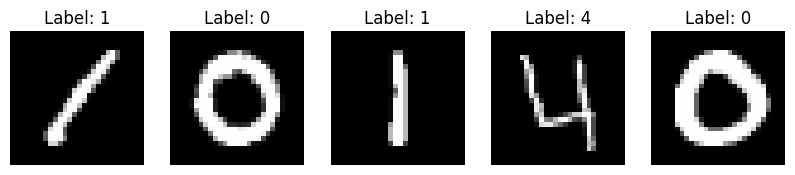

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i, 0], cmap="gray")
    ax.set_title(f"Label: {y[i].item()}")
    ax.axis("off")
plt.show()
